In [34]:
%pylab inline
import numpy as np
import seaborn as sns

from scipy.stats import norm


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# A/B Test Example

| Variation | Conversion | View | Conversion Rate | SE | Confidence Interval |  Change | Z-Score | Confidence | 
|:----------|:-----------|:-----|:----------------|:---|:--------------------|:--------|:--------|:-----------|
| Variation A (Control Group) | 330 | 1093 | 30.19% | 0.0138 | $ \pm 2.31 $ % | - | - | - |
| Variation B (Test Group)    | 491 | 1123 | 43.72% | 0.0148 | $ \pm 2.25 $ % | 44.82% | 6.4946 |


## Conversion Rate 

각각의 variation마다 conversion rate를 다음과 같이 계산 할  수 있습니다.

$$ CR = \frac{\text{event count}}{\text{view count}} $$

위의 A/B Text를 예로 든다면..

$$ \begin{align} 
CR_A &= \frac{330}{1093} = 0.3019213174748399  \\
CR_B &= \frac{491}{1123} = 0.43722172751558325 
\end{align} $$



## Standard Error for Bernoulli Distribution

Conversion rate에 대한 confidence interval을 계산하기 위해서는 standard error를 계산해야 합니다. 

$$ SE = \sqrt{\frac{CR(1-CR)}{n}} $$

* $ p $ : conversion rate
* $ n $ : sample size (view)

위의 예를 든다면 다음과 같습니다. 

$$ \begin{align} 
SE_{A} &= \sqrt{\frac{0.3019 * (1-0.3019)}{1093}} = 0.0138 \\
SE_{B} &= \sqrt{\frac{0.4372 * (1-0.4372)}{1123}} = 0.0148 \\
\end{align} $$



### 자세한 설명

베르누이 분포는  $ P(X=1) = p $ 그리고 $ P(X=0) = (1-p) $ 와 같이 오직 두가지 가능한 결과가 일어난다고 했을때 사용되는 분포입니다.<br>

$$ X \sim \mathcal{Bernoulli} (CR) $$

여기서 p는 variation의 conversion rate를 가르킵니다.<br>
이때 mean 그리고 variance는 다음과 같습니다. 

$$ \begin{align} 
E[X] &= CR \\
Var(X) &= CR(1-CR)
\end{align} $$

Central limit theorem에 따르면 다수의 표본 평균을 계산함으로서 모평균을 추정할 수 있습니다.<br>
즉 표본평균으로 나온 $ p $ 의 분포는 정규분포를 따르며, 
standard deviation $ \sigma $는 평균의 표준오차 (the standard error of the mean, SEM) 와 동일합니다.<br>
The standard error of the mean 의 공식은 아래와 같습니다.

$$ \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \frac{\sqrt{CR(1-CR)}}{\sqrt{n}} = \sqrt{\frac{CR(1-CR)}{n}} $$

추가적으로 p는 정규분포를 따름으로 다음과 같이 정의할수 있습니다.

$$ \hat{CR} \sim \mathcal{Normal} \left(u=CR, \sigma= \sqrt{\frac{CR(1-CR)}{n}} \right) $$

**아주쉽게 말하면, 표본 평균의 standard error는 표본이 따르는 정규분포의 1 standard deviation이라고 말할 수 있습니다.**

## Confidence Interval

confidence interval (신뢰구간)의 공식은 다음과 같습니다.

$$ CR \pm Z \sqrt{ \frac{CR(1-CR)}{n} } $$

* CR: Conversion rate
* Z: Z-Score of the standard deviation
* n: sample size

| Confidence Level | Python          | Z-Score | 
|:-----------------|:----------------|:--------|
| 80% 신뢰수준       | norm.ppf(0.8)   | 0.8416  |
| 90% 신뢰수준       | norm.ppf(0.9)   | 1.2815  |
| 95% 신뢰수준       | norm.ppf(0.95)  | 1.6448  |
| 99% 신뢰수준       | norm.ppf(0.99)  | 2.3263  |
| 99.5% 신뢰수준     | norm.ppf(0.995) | 2.5758  | 
| 99.9% 신뢰수준     | norm.ppf(0.999) | 3.0902  |


$$ CL_A = 1.6448 * np.sqrt{ \frac{CR_A ( 1- CR_A)}{} } $$

0.95 1.6448536269514722
0.95 1.959963984540054


1.6448536269514722

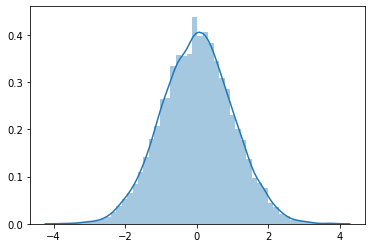

In [53]:
print('0.95', norm.ppf(0.95))
print('0.95', norm.ppf(0.975))
norm()

x = np.random.normal(size=10000)
sns.distplot(x)
n = norm(np.mean(x), np.std(x))
norm.ppf(0.95)